<a id='sec2'></a>
___
## Part 1: Import Packages + Libraries + Dependencies

### Import Packages

In [377]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Models and splitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

### Load Data

In [378]:
train_df = pd.read_csv(r'C:\Users\Dell\Desktop\Plaksha Academics\Term 4\Data_X\titanic_ML\train.csv')
test_df = pd.read_csv(r'C:\Users\Dell\Desktop\Plaksha Academics\Term 4\Data_X\titanic_ML\test.csv')
combine = [train_df, test_df]
# combine is used to ensure whatever preprocessing is done on training data
# is also done on test data

# NOTE! When we change train_df or test_df the objects in combine 
# will also change (combine is only a pointer to the objects)

<a id='sec3'></a>
___
## Part 2: Exploring and Preprocessing the Data
**Data descriptions**

<img src="https://github.com/afo/kuwait-ai-blockchain/blob/master/05a-tools-titanic/data/Titanic_Variable.png?raw=1">

In [379]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [380]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dropping 'cabin' column from both train and test data set as it has a lot of missing values

In [381]:
for i in combine:
    i.drop('Cabin',axis=1,inplace=True)

Dropping 'Ticket' Column as it is just a alphanumeric string which won't help in further data analysis.

In [382]:
for i in combine:
    i.drop(['Ticket','Name'],axis=1,inplace=True)

In [383]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [384]:
print("The number of missing values in training dataset: \n{}".format(train_df.isna().sum()))
print("The number of missing values in testing dataset: \n{}".format(test_df.isna().sum()))

The number of missing values in training dataset: 
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
The number of missing values in testing dataset: 
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [385]:
train_df.iloc[:,1:].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As Sex is a categorical value, converting it into a categorical data.

In [386]:
for i in combine:
    i.loc[i['Sex']=='female','Sex']=0
    i.loc[i['Sex']=='male','Sex']=1
Sex={'male':1,'female':0}

In [387]:
train_df[['Sex','Survived']].groupby(by='Sex').mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [388]:
print("The training data set has {} number of missing values".format(train_df['Age'].isna().sum()))

The training data set has 177 number of missing values


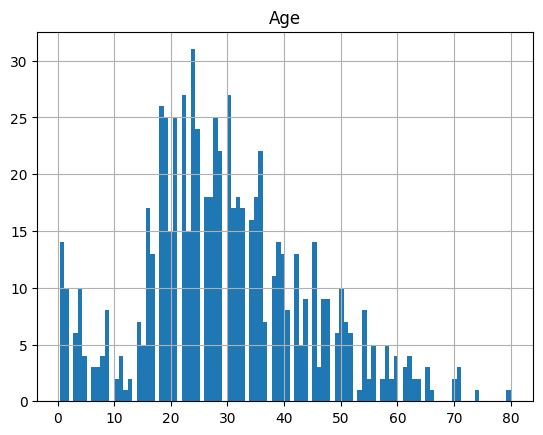

In [389]:
train_df.hist(column='Age',bins=100)
plt.show()

In [390]:
for dataset in combine:
    Bracket=round(dataset.groupby(by=['Pclass','Sex']).mean()['Age'],0)
    for j in range(2):
        for k in range(3):
            dataset.loc[(dataset['Pclass']==k+1) & (dataset['Age'].isnull()) & (dataset['Sex']==j),'Age']=Bracket[k+1,j]

Binning the age column into 4 categories based on quartile

In [391]:
for dataset in combine:
    dataset.loc[dataset['Age']<20,'Age']=0
    dataset.loc[(dataset['Age']>=20) & (dataset['Age']<28),'Age']=1
    dataset.loc[(dataset['Age']>=28) & (dataset['Age']<38),'Age']=2
    dataset.loc[dataset['Age']>=38,'Age']=4

Converting the categorical column of embarked into numerical values

In [392]:
for dataset in combine:
    binary_encoded = pd.get_dummies(dataset.Embarked)
    newcols = binary_encoded.columns
    dataset[newcols] = binary_encoded

In [393]:
# To replace Nan value in 'Embarked', we will use the mode
# in 'Embaraked'. This will give us the most frequent port 
# the passengers embarked from

freq_port = train_df['Embarked'].dropna().mode()[0]
print('Most frequent port of Embarkation:',freq_port)

Most frequent port of Embarkation: S


In [394]:
# Fill NaN 'Embarked' Values in the datasets

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True) \
                    .mean().sort_values(by='Survived', ascending=False)


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [395]:
test_df.loc[test_df['Fare'].isna(),'Fare']=0

In [396]:
for dataset in combine:
    dataset.drop(columns='Embarked',inplace=True)

In [397]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.035956,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.029565,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.421465,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Age,0.035956,-0.029565,-0.421465,1.000000,-0.202501,-0.088973,0.125241,0.033385,-0.111456,0.032748
SibSp,-0.057527,-0.035322,0.083081,-0.202501,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.088973,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.125241,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
C,-0.001205,0.168240,-0.243292,0.033385,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Q,-0.033606,0.003650,0.221009,-0.111456,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
S,0.022148,-0.155660,0.081720,0.032748,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


### Finished -- Preprocessing Complete!

<a id='sec5'></a>
___
## Part 4: Machine Learning!
Now we will Model, Predict, and Choose from algorithms for classification. 
We will try using different classifiers to model and predict. 

We ultimately will choose the best model from:
1. Logistic Regression
2. Support Vector Machines (SVM)
3. Perceptron
4. XGBoost
5. Random Forest

In [398]:
X = train_df.drop(['PassengerId','Survived'], axis=1) # Training & Validation data
Y = train_df["Survived"]              # Response / Target Variable

X_submission  = test_df.drop("PassengerId", axis=1).copy()

print(X.shape, Y.shape)

(891, 9) (891,)


In [399]:
# Split training set so that we validate on 20% of the data
# Note that our algorithms will never have seen the validation 
# data during training. This is to evaluate how good our estimators are.

np.random.seed(42) # set random seed for reproducibility

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,stratify=Y)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(712, 9) (712,)
(179, 9) (179,)


___
> ### Scikit-Learn general ML workflow
> 1. __Instantiate__ model object
> 2. __Fit__ model to training data
> 3. __Predict & Evaluate__ predict output for data not used during training and compare predicitons against true output values to form an accuracy measure.

___

### 1. Logistic Regression

In [400]:
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
acc_log_2 = logreg.score(X_val, Y_val)                       # evaluate

print('Logistic Regression using built-in method:', str(round(acc_log_2*100,2)),'%')

Logistic Regression using built-in method: 81.01 %


### 2. SVC

In [401]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC(C=10)                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 65.36 %


### 3. Random Forest

In [402]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('Random Forest labeling accuracy:', str(round(acc_rf*100,2)),'%')

Random Forest labeling accuracy: 79.89 %


### 4. Decision Trees

In [408]:
# Random Forest
decision_trees = DecisionTreeClassifier(max_depth=10,random_state=42,class_weight='balanced')   # instantiate
decision_trees.fit(X_train, Y_train)                         # fit
acc_dt = decision_trees.score(X_val, Y_val)                  # predict + evaluate

print('Decision Trees labeling accuracy:', str(round(acc_dt*100,2)),'%')

Decision Trees labeling accuracy: 81.56 %


### 5. Histogram-based Gradient Boosting

In [406]:
hgboost=HistGradientBoostingClassifier(learning_rate=0.01,max_iter=100,max_depth=100)
hgboost.fit(X_train,Y_train)
acc_hgboost = hgboost.score(X_val,Y_val)

print('Histogram-based gradient boosting labeling accuracy:', str(round(acc_hgboost*100,2)),'%')

Histogram-based gradient boosting labeling accuracy: 79.89 %


# Compete on Kaggle!

In [411]:
# How to create a Kaggle submission with a Random Forest Classifier
Y_submission = logreg.predict(X_submission)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_submission
    })
submission.to_csv('titanic.csv', index=False)